In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
adata1 = ad.read_h5ad('./vt_22.04_annotated.h5ad')
adata3 = ad.read_h5ad('./yang_24.06_annotated.h5ad')

In [3]:
adata1

AnnData object with n_obs × n_vars = 13532 × 22999
    obs: 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'cell_type', 'unique_cell_type'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Sample_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'scrublet', 'umap', 'unique_cell_type_colors', 'wilcoxon'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spl

In [4]:
adata3

AnnData object with n_obs × n_vars = 26409 × 24587
    obs: 'Author', 'BioSample', 'Run', 'Tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.14', 'leiden_res_0.10', 'leiden_res_0.09', 'cell_type', 'unique_cell_type'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'BioSample_colors', 'cell_type_colors', 'hvg', 'leiden_res_0.09', 'leiden_res_0.09_colors', 'leiden_res_0.10', 'leiden_res_0.10_colors', 'leiden_res_0.10_sizes', 

In [5]:
# Extract raw counts 
raw_counts_1 = adata1.layers["counts"].copy()
raw_counts_3 = adata3.layers["counts"].copy()

In [6]:
# Create new AnnData objects with raw counts
adata1_raw = ad.AnnData(X=raw_counts_1, 
                          obs=adata1.obs.copy(), 
                          var=adata1.var.copy())

adata3_raw = ad.AnnData(X=raw_counts_3, 
                          obs=adata3.obs.copy(), 
                          var=adata3.var.copy())

In [7]:
adata3_raw.obs["Sample"] = adata3_raw.obs["BioSample"]

In [8]:
adata1_raw

AnnData object with n_obs × n_vars = 13532 × 22999
    obs: 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'cell_type', 'unique_cell_type'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [9]:
adata3_raw

AnnData object with n_obs × n_vars = 26409 × 24587
    obs: 'Author', 'BioSample', 'Run', 'Tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.14', 'leiden_res_0.10', 'leiden_res_0.09', 'cell_type', 'unique_cell_type', 'Sample'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [10]:
adata1_raw.obs["Trimester"] = "First"
adata3_raw.obs["Trimester"] = "Third"

In [11]:
# Concatenate datasets
adata = ad.concat([adata1_raw, adata3_raw], join='inner',index_unique='_')

In [12]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [15]:
sc.pp.combat(adata, key='Trimester')

In [ ]:
# adata.write('scmerged_23.07.h5ad') 

In [16]:
adata

AnnData object with n_obs × n_vars = 39941 × 21676
    obs: 'Sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'unique_cell_type', 'Trimester'
    uns: 'log1p'
    layers: 'counts'

In [2]:
adata = ad.read_h5ad('./scmerged_23.07.h5ad')

In [3]:
mitocarta = pd.read_csv("./MitoCarta_full_transformed.csv")

In [4]:
# Extract all unique mitochondrial genes
mt_list = mitocarta['Gene'].unique().tolist()
len(mt_list)

1136

In [5]:
# Create boolean column for mitochondrial genes
adata.var['mito_gene'] = adata.var_names.map(lambda x: x.split('.')[0] in mt_list)
adata.var['mito_gene'].sum()

1086

In [6]:
missing_genes = [gene for gene in mt_list if gene not in adata.var_names]
missing_genes

['FASTKD5',
 'GARS1',
 'KARS1',
 'MARS2',
 'MRPL53',
 'MYG1',
 'MT-ATP6',
 'MT-ATP8',
 'MT-CO1',
 'MT-CO2',
 'MT-CO3',
 'MT-CYB',
 'MT-ND1',
 'MT-ND2',
 'MT-ND3',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'MT-ND6',
 'ACOD1',
 'ACSM2B',
 'ACSM4',
 'AGXT2',
 'CYP11B1',
 'CYP11B2',
 'FABP1',
 'FTMT',
 'GLYAT',
 'GPX1',
 'HAO2',
 'HTD2',
 'LIPT1',
 'MTARC1',
 'MTARC2',
 'OXCT2',
 'PDHA2',
 'PDP2',
 'PRODH',
 'SLC25A31',
 'SLC25A41',
 'SLC25A52',
 'SLC25A18',
 'SLC25A48',
 'SPHKAP',
 'MARCHF5',
 'RTL10',
 'SPATA19',
 'ATP5MF-PTCD1',
 'MCCD1',
 'RP11_469A15.2']

In [7]:
len(missing_genes)

50

In [8]:
# Create a dictionary where each gene maps to a list of pathways
gene_to_pathway_dict = mitocarta.groupby('Gene')['MitoPathway'].apply(list).to_dict()

# Add pathway information to the var metadata 
adata.var['MitoPathways'] = adata.var_names.map(lambda x: gene_to_pathway_dict.get(x.split('.')[0], []))
# Check the result
adata.var[['MitoPathways']].head()

,MitoPathways
Gene,
AC145212.1,[]
MAFIP,[]
AC011043.1,[]
AL592183.1,[]
AC240274.1,[]


/home/shannon/miniconda3/envs/RP1/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


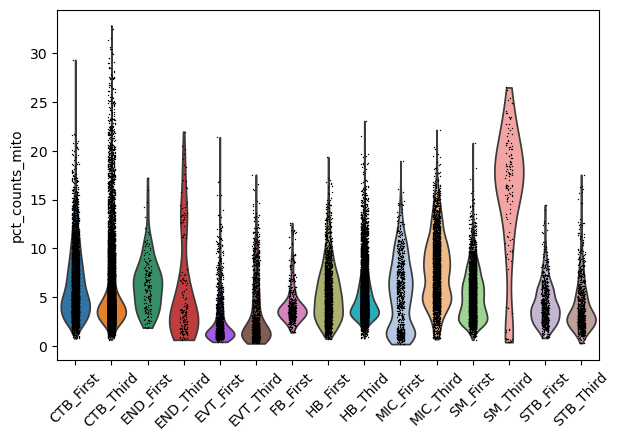

In [9]:
# Calculate mitochondrial percentage using your custom gene list
adata.obs['pct_counts_mito'] = (adata[:, adata.var['mito_gene']].X.sum(axis=1) / 
                                adata.obs['total_counts']) * 100

# Create combined grouping variable
adata.obs['cell_type_trimester'] = adata.obs['cell_type'].astype(str) + '_' + adata.obs['Trimester'].astype(str)

# Violin plot grouped by cell type and trimester
sc.pl.violin(adata[adata.obs['Trimester'].isin(['First', 'Third'])], 
             keys='pct_counts_mito', 
             groupby='cell_type_trimester',
             rotation=45)

In [10]:
# Check that no genes are all zeros in either trimester
first_mask = adata.obs['Trimester'] == 'First'
third_mask = adata.obs['Trimester'] == 'Third'

# Count genes with zero expression in each trimester
first_zero_genes = (adata[first_mask].X.sum(axis=0) == 0).sum()
third_zero_genes = (adata[third_mask].X.sum(axis=0) == 0).sum()

print(f"Genes with zero expression in First trimester: {first_zero_genes}")
print(f"Genes with zero expression in Third trimester: {third_zero_genes}")
print(f"Total genes in combined dataset: {adata.n_vars}")

Genes with zero expression in First trimester: 0
Genes with zero expression in Third trimester: 0
Total genes in combined dataset: 21676


In [11]:
pathway_names = ["OXPHOS", "OXPHOS_subunits", "OXPHOS_assembly_factors", "Complex_I", "CI_subunits", "CI_assembly_factors", 
                 "Complex_II", "CII_subunits", "CII_assembly_factors",
                 "Complex_III", "CIII_subunits", "CIII_assembly_factors",
                 "Complex_IV", "CIV_subunits", "CIV_assembly_factors",
                 "Complex_V", "CV_subunits", "CV_assembly_factors",
                 "Respirasome_assembly", "Cytochrome_C"]

In [12]:
pathway_genes = {}
for pathway in pathway_names:
    pathway_genes[pathway] = adata.var[adata.var['MitoPathways'].apply(lambda x: pathway in x)].index.tolist()
    print(f"Found {len(pathway_genes[pathway])} genes for {pathway}")

Found 156 genes for OXPHOS
Found 89 genes for OXPHOS_subunits
Found 68 genes for OXPHOS_assembly_factors
Found 59 genes for Complex_I
Found 37 genes for CI_subunits
Found 22 genes for CI_assembly_factors
Found 8 genes for Complex_II
Found 4 genes for CII_subunits
Found 4 genes for CII_assembly_factors
Found 15 genes for Complex_III
Found 9 genes for CIII_subunits
Found 6 genes for CIII_assembly_factors
Found 48 genes for Complex_IV
Found 18 genes for CIV_subunits
Found 30 genes for CIV_assembly_factors
Found 24 genes for Complex_V
Found 19 genes for CV_subunits
Found 5 genes for CV_assembly_factors
Found 4 genes for Respirasome_assembly
Found 2 genes for Cytochrome_C


In [13]:
pathway_expr_data = []
for cell_type in ['CTB', 'STB', 'EVT']:
    for trimester in ['First', 'Third']:
        mask = (adata.obs['cell_type'] == cell_type) & (adata.obs['Trimester'] == trimester)
        if mask.sum() > 0:
            row_data = {
                'cell_type': cell_type,
                'Trimester': trimester,
                'group': f"{cell_type}_{trimester}"
            }
           
            
            for pathway in pathway_names:
                genes = pathway_genes[pathway]  
                if len(genes) > 0:
                    mean_expr = float(adata[mask, genes].X.mean())
                    row_data[pathway] = mean_expr
                else:
                    row_data[pathway] = np.nan
           
            pathway_expr_data.append(row_data)

pathway_df = pd.DataFrame(pathway_expr_data)
pathway_matrix = pathway_df.set_index('group')[pathway_names].astype(float)

In [14]:
pathway_matrix.columns = pathway_matrix.columns.str.replace('_', ' ')

In [15]:
pathway_matrix

,OXPHOS,OXPHOS subunits,OXPHOS assembly factors,Complex I,CI subunits,CI assembly factors,Complex II,CII subunits,CII assembly factors,Complex III,CIII subunits,CIII assembly factors,Complex IV,CIV subunits,CIV assembly factors,Complex V,CV subunits,CV assembly factors,Respirasome assembly,Cytochrome C
group,,,,,,,,,,,,,,,,,,,,
CTB_First,0.636001,0.955868,0.208620,0.596182,0.828298,0.205806,0.281555,0.379189,0.183921,0.803380,1.241302,0.146498,0.481046,0.890374,0.235449,1.040489,1.281204,0.125773,0.310087,0.683586
CTB_Third,0.696880,1.044924,0.231841,0.659826,0.911809,0.236036,0.295376,0.396992,0.193760,0.854991,1.303641,0.182014,0.530887,0.988272,0.256455,1.123991,1.386254,0.127395,0.316201,0.906422
STB_First,0.422167,0.638321,0.133667,0.372891,0.530134,0.108437,0.235510,0.362043,0.108978,0.530183,0.847505,0.054200,0.366606,0.701043,0.165944,0.606362,0.744147,0.082778,0.409226,0.681141
STB_Third,0.523582,0.801664,0.152664,0.478997,0.689479,0.125004,0.217568,0.342338,0.092797,0.679783,1.075353,0.086428,0.434973,0.851334,0.185156,0.772660,0.958216,0.067546,0.400930,0.629842
EVT_First,0.534824,0.792082,0.190954,0.482490,0.666055,0.173767,0.246883,0.338453,0.155312,0.663054,1.017533,0.131334,0.429673,0.769474,0.225792,0.848991,1.051886,0.077989,0.370063,0.751620
EVT_Third,0.439239,0.660680,0.143269,0.392441,0.549762,0.127857,0.164918,0.209161,0.120674,0.561956,0.868172,0.102632,0.362566,0.684066,0.169665,0.709041,0.882742,0.048976,0.271607,0.361909


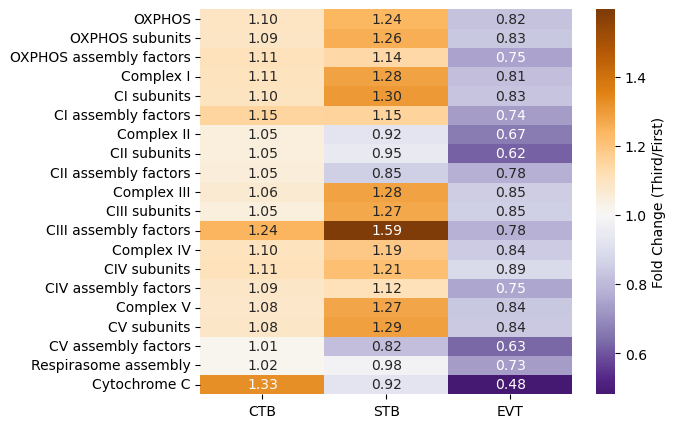

In [16]:
# Calculate fold changes (Third/First trimester) for each cell type
fold_changes = []

for cell_type in ['CTB', 'STB', 'EVT']:
    first_expr = pathway_matrix.loc[f"{cell_type}_First"]
    third_expr = pathway_matrix.loc[f"{cell_type}_Third"]
    
    fold_change = (third_expr / first_expr).replace([np.inf, -np.inf], np.nan)
    fold_changes.append({
        'cell_type': cell_type,
        **fold_change.to_dict()
    })

fc_df = pd.DataFrame(fold_changes).set_index('cell_type')

# Visualize fold changes
plt.figure(figsize=(6, 5))
sns.heatmap(fc_df.T, 
            annot=True, 
            cmap='PuOr_r', 
            center=1,
            cbar_kws={'label': 'Fold Change (Third/First)'},
            fmt='.2f')
_=plt.xlabel("")
# plt.title('Single-cell: OXPHOS Fold Changes')
# plt.ylabel('OXPHOS Subpathways')
# plt.tight_layout()
# Save the figure
plt.savefig("sc_FCheatmap.png", dpi=300, bbox_inches='tight')

#### DEG analysis ####

In [32]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [33]:
# subset True for mito_gene
adata_mito = adata[:, adata.var["mito_gene"]].copy()

#### CTB ####

In [34]:
# subset CTBs 
cell_subset = adata_mito[adata_mito.obs['cell_type'] == 'CTB']

pbs = [] # initialise empty list to store pseudobulk adatas for each sample
# loop through each Sample 
for sample in cell_subset.obs.Sample.unique(): 
    # filter for cells only in current sample
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample].copy()  
   
    # sum raw counts across all cells in current sample (counts layer contains raw data)
    summed_counts = samp_cell_subset.layers['counts'].sum(axis=0) # axis=0 means sum along rows 
   
    # if sparse, converts matrix to a dense 1D numpy array 
    if hasattr(summed_counts, 'A1'):  # sparse matrix
        summed_counts = summed_counts.A1
   
    # reshape 1D array to 2D with 1 row (1 pseudobulk sample) and columns (n_genes)
    summed_counts = summed_counts.reshape(1, -1) # -1 means infer column number automatically

    # create anndata object for this pseudobulk sample
    rep_adata = sc.AnnData(X = summed_counts,
                           var = samp_cell_subset.var[[]]) # select and copy gene metadata from og data

    # replaces all cell (obs) names with the current sample identifier 
    rep_adata.obs_names = [sample]
    # add trimester info to pseudoblulk sample metadata (iloc[0] takes first value)
    rep_adata.obs['Trimester'] = samp_cell_subset.obs['Trimester'].iloc[0]
   
    pbs.append(rep_adata)

pb = sc.concat(pbs) # concatentates all psuedobulk samples into single anndata object

pb.obs

,Trimester
FCA7196220,First
FCA7196226,First
FCA7511884,First
SAMN18844857,Third
SAMN18844863,Third


In [35]:
# convert count matrix (X) of pseudobulk anndata into Pandas df
counts = pd.DataFrame(pb.X, columns = pb.var_names) # assigns gene names as column headers

# create deseq2 object with 3 components
dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
                   metadata=pb.obs,
                   design_factors="Trimester") # specifies testing differences between trimesters

dds.deseq2() # run deseq2 algorithm 
# create statistics object to perform differential expression with' specifies third/first comparison 
stat_res = DeseqStats(dds, n_cpus=8, contrast=('Trimester', 'Third', 'First'))
stat_res.summary() 

Using None as control genes, passed at DeseqDataSet initialization


/tmp/ipykernel_60051/3086428047.py:5: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.60 seconds.

Fitting dispersion trend curve...
... done in 0.08 seconds.

/home/shannon/miniconda3/envs/RP1/lib/python3.10/site-packages/pydeseq2/dds.py:541: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.65 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: Trimester Third vs First
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Gene                                                                         
AURKAIP1  7190.034817        0.005793  0.225313  0.025712  0.979487  0.989729
MRPL20    4461.272734        0.084695  0.259255  0.326687  0.743905  0.895550
ACOT7      414.882340       -0.338743  0.314593 -1.076766  0.281585  0.539324
DNAJC11    258.652465        0.764778  0.371016  2.061305  0.039274  0.159955
CASP9      320.394317        0.621937  0.347022  1.792209  0.073099  0.231954
...               ...             ...       ...       ...       ...       ...
GLUD2       95.150750        1.254626  0.578483  2.168820  0.030096  0.132749
SLC25A14   160.270945       -0.406486  0.363769 -1.117430  0.263811  0.528165
ABCD1      235.362325        0.062070  0.379424  0.163591  0.870054  0.950908
TAZ        113.666472       -0.182672  0.444702 -0.410773  0.681239  0.856199
F

... done in 3.59 seconds.



In [36]:
df = stat_res.results_df.sort_values('stat', ascending = False)
#results_df.to_csv('CTB_deseq2.csv')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
IDI1,5140.132314,3.240894,0.261551,12.391041,2.922260e-35,3.106362e-32
PMAIP1,10825.516354,3.419762,0.395130,8.654779,4.938690e-18,1.749943e-15
GLS,108.462077,4.547127,0.538582,8.442776,3.098894e-17,8.235312e-15
SOD2,402.057768,3.012147,0.360882,8.346629,7.023905e-17,1.493282e-14
PDK4,895.819302,3.893701,0.474724,8.202031,2.363589e-16,4.187493e-14
...,...,...,...,...,...,...
CYP11A1,1816.329036,-2.348247,0.310178,-7.570644,3.713783e-14,3.947752e-12
ARMCX3,602.145387,-3.258780,0.410419,-7.940122,2.019824e-15,2.683841e-13
ALDH2,531.588213,-4.560386,0.380370,-11.989328,4.041691e-33,2.148159e-30


In [37]:
# Significant genes with fold change threshold
padj_threshold = 0.05
lfc_threshold = 1
# Create boolean mask with the two threshold conditions 
significant_genes = df[(df['padj'] < padj_threshold) & 
                      (abs(df['log2FoldChange']) > lfc_threshold)] # absolute value considers both + and -ve FC
significant_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
IDI1,5140.132314,3.240894,0.261551,12.391041,2.922260e-35,3.106362e-32
PMAIP1,10825.516354,3.419762,0.395130,8.654779,4.938690e-18,1.749943e-15
GLS,108.462077,4.547127,0.538582,8.442776,3.098894e-17,8.235312e-15
SOD2,402.057768,3.012147,0.360882,8.346629,7.023905e-17,1.493282e-14
PDK4,895.819302,3.893701,0.474724,8.202031,2.363589e-16,4.187493e-14
...,...,...,...,...,...,...
MRPL23,1270.702517,-2.014345,0.329672,-6.110141,9.954287e-10,5.878560e-08
ARF5,689.172946,-2.266337,0.311904,-7.266142,3.698994e-13,3.024639e-11
CYP11A1,1816.329036,-2.348247,0.310178,-7.570644,3.713783e-14,3.947752e-12


In [38]:
# Group mitocarta by Gene and concatenate unique pathways
mitocarta_grouped = mitocarta.groupby('Gene')['MitoPathway'].apply( # groups genes by name, selecting MitoPathway columns
    lambda x: '; '.join(x.unique()) # removes duplicate pathway names and concatenates into string separated by ;
).reset_index() # converts grouped result to df with columns Gene and MitoPathway

# Merge df with significant genes
significant_genes_with_pathways = significant_genes.merge(
    mitocarta_grouped, 
    on='Gene', # matches rows based on Gene column in both df
    how='left' # keeps all genes in significant_genes (left table), and adds pathway data
) 

significant_genes_with_pathways.to_csv('./CTBsigDEGs.csv')
significant_genes_with_pathways

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MitoPathway
0,IDI1,5140.132314,3.240894,0.261551,12.391041,2.922260e-35,3.106362e-32,Metabolism; Lipid_metabolism; Cholesterolassoc...
1,PMAIP1,10825.516354,3.419762,0.395130,8.654779,4.938690e-18,1.749943e-15,Mitochondrial_dynamics_and_surveillance; Apopt...
2,GLS,108.462077,4.547127,0.538582,8.442776,3.098894e-17,8.235312e-15,Metabolism; Amino_acid_metabolism; Glutamate_m...
3,SOD2,402.057768,3.012147,0.360882,8.346629,7.023905e-17,1.493282e-14,Metabolism; Detoxification; ROS_and_glutathion...
4,PDK4,895.819302,3.893701,0.474724,8.202031,2.363589e-16,4.187493e-14,Metabolism; Carbohydrate_metabolism; Pyruvate_...
...,...,...,...,...,...,...,...,...
97,MRPL23,1270.702517,-2.014345,0.329672,-6.110141,9.954287e-10,5.878560e-08,Mitochondrial_central_dogma; Translation; Mito...
98,ARF5,689.172946,-2.266337,0.311904,-7.266142,3.698994e-13,3.024639e-11,0
99,CYP11A1,1816.329036,-2.348247,0.310178,-7.570644,3.713783e-14,3.947752e-12,"Metabolism; Lipid_metabolism; Cholesterol,_bil..."
100,ARMCX3,602.145387,-3.258780,0.410419,-7.940122,2.019824e-15,2.683841e-13,Mitochondrial_dynamics_and_surveillance; Traff...


In [39]:
# Calculate Enrichment 
## get all pathways from significant genes (split the concatenated pathways)
all_sig_pathways = []
for pathways in significant_genes_with_pathways['MitoPathway']: 
    all_sig_pathways.extend(pathways.split('; ')) # separates pathways and adds individual pathways to list

# Count genes per pathway in significant genes AND collect gene names
sig_pathway_counts = {} # stores no. sigDEGs in each pathway
pathway_genes = {}  # stores genes for each pathway

for idx, row in significant_genes_with_pathways.iterrows():  # loops over the index of each row to 
    gene = row['Gene']                                       # extract gene name and pathways 
    pathways = row['MitoPathway']
    
    for pathway in pathways.split('; '): # splits pathway string into individual names 
        # Count genes associated with pathway
        sig_pathway_counts[pathway] = sig_pathway_counts.get(pathway, 0) + 1 # returns current count for pathway and pathway appearence adds 1 count increments (if pathway doesn't exist yet in dictionary, get() returns 0)
        
        # Collect gene names
        if pathway not in pathway_genes: # if pathway doesn't exist in pathway_genes dictionary
            pathway_genes[pathway] = []  # creates empty list for pathway
        pathway_genes[pathway].append(gene) # adds gene name to pathway's gene list

# Count total genes per pathway in original mitocarta
total_pathway_counts = mitocarta['MitoPathway'].value_counts().to_dict()

# Calculate enrichment (proportion in significant / proportion in background)
enrichment_data = []
for pathway in sig_pathway_counts.keys(): # loops over each pathway 
    sig_count = sig_pathway_counts[pathway] # retrieves no. DEGs in this pathway
    total_count = total_pathway_counts[pathway] # total no. genes in pathway
    
    # Calculate enrichment ratio
    enrichment_ratio = sig_count / total_count
    
    # Get the list of DEGs for this pathway
    genes_in_pathway = pathway_genes[pathway] 

    enrichment_data.append({
        'MitoPathway': pathway,
        'Significant_Count': sig_count,
        'Total_Count': total_count,
        'Enrichment_Ratio': enrichment_ratio,
        'DEGs_in_Pathway': '; '.join(genes_in_pathway),  
        'Cell_Type': 'CTB'
    })

# Create DataFrame
enrichment_df = pd.DataFrame(enrichment_data)

# Sort by enrichment ratio
enrichment_df_ctb = enrichment_df.sort_values('Enrichment_Ratio', ascending=True)
enrichment_df_ctb.to_csv('./CTB_enrichment.csv')
enrichment_df_ctb
# print(enrichment_df[['MitoPathway', 'Significant_Count', 'Total_Count', 'Enrichment_Ratio', 'DEGs_in_Pathway_str']])

,MitoPathway,Significant_Count,Total_Count,Enrichment_Ratio,DEGs_in_Pathway,Cell_Type
54,Vitamin_metabolism,1,49,0.020408,SLC25A19,CTB
79,Nucleotide_synthesis_and_processing,1,24,0.041667,SUCLG2,CTB
76,Mitochondrial_ribosome_assembly,1,24,0.041667,RBFA,CTB
40,FeS_cluster_biosynthesis,1,23,0.043478,ISCA1,CTB
59,Phospholipid_metabolism,1,23,0.043478,GPAT2,CTB
...,...,...,...,...,...,...
2,Cholesterolassociated,1,2,0.500000,IDI1,CTB
13,Cytochrome_C,1,2,0.500000,CYCS,CTB
93,OXA,1,1,1.000000,OXA1L,CTB
55,Vitamin_B1_metabolism,1,1,1.000000,SLC25A19,CTB


#### STB ####

In [40]:
# subset STBs 
cell_subset = adata_mito[adata_mito.obs['cell_type'] == 'STB']

pbs = [] # initialise empty list to store pseudobulk adatas for each sample
# loop through each Sample 
for sample in cell_subset.obs.Sample.unique(): 
    # filter for cells only in current sample
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample].copy()  
   
    # sum raw counts across all cells in current sample (counts layer contains raw data)
    summed_counts = samp_cell_subset.layers['counts'].sum(axis=0) # axis=0 means sum along rows 
   
    # if sparse, converts matrix to a dense 1D numpy array 
    if hasattr(summed_counts, 'A1'):  # sparse matrix
        summed_counts = summed_counts.A1
   
    # reshape 1D array to 2D with 1 row (1 pseudobulk sample) and columns (n_genes)
    summed_counts = summed_counts.reshape(1, -1) # -1 means infer column number automatically

    # create anndata object for this pseudobulk sample
    rep_adata = sc.AnnData(X = summed_counts,
                           var = samp_cell_subset.var[[]]) # select and copy gene metadata from og data

    # replaces all cell (obs) names with the current sample identifier 
    rep_adata.obs_names = [sample]
    # add trimester info to pseudoblulk sample metadata (iloc[0] takes first value)
    rep_adata.obs['Trimester'] = samp_cell_subset.obs['Trimester'].iloc[0]
   
    pbs.append(rep_adata)

pb = sc.concat(pbs) # concatentates all psuedobulk samples into single anndata object

pb.obs

,Trimester
FCA7196220,First
FCA7196226,First
FCA7511884,First
SAMN18844857,Third
SAMN18844863,Third


In [41]:
# convert count matrix (X) of pseudobulk anndata into Pandas df
counts = pd.DataFrame(pb.X, columns = pb.var_names) # assigns gene names as column headers

# create deseq2 object with 3 components
dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
                   metadata=pb.obs,
                   design_factors="Trimester") # specifies testing differences between trimesters

dds.deseq2() # run deseq2 algorithm 
# create statistics object to perform differential expression with' specifies third/first comparison 
stat_res = DeseqStats(dds, n_cpus=8, contrast=('Trimester', 'Third', 'First'))
stat_res.summary() 

Using None as control genes, passed at DeseqDataSet initialization


/tmp/ipykernel_60051/3086428047.py:5: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.58 seconds.

Fitting dispersion trend curve...
... done in 0.07 seconds.

/home/shannon/miniconda3/envs/RP1/lib/python3.10/site-packages/pydeseq2/dds.py:541: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.51 seconds.

Fitting LFCs...
... done in 0.65 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: Trimester Third vs First
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Gene                                                                        
AURKAIP1  687.222493        0.228215  0.367825  0.620443  0.534966  0.840590
MRPL20    360.358103        0.304972  0.362094  0.842243  0.399652  0.789186
ACOT7      31.188074        0.529254  0.612727  0.863767  0.387716  0.777925
DNAJC11    15.960812        0.632048  0.754675  0.837510  0.402306       NaN
CASP9      44.621696        0.565495  0.538265  1.050590  0.293447  0.698897
...              ...             ...       ...       ...       ...       ...
GLUD2       3.281373        2.602635  1.654771  1.572807  0.115764       NaN
SLC25A14    4.612165       -3.533717  1.561789 -2.262608  0.023660       NaN
ABCD1      40.401932        0.373698  0.566169  0.660047  0.509224  0.834729
TAZ         6.354146        1.180436  1.284954  0.918660  0.358273       NaN
FUNDC2    155

... done in 3.58 seconds.



In [42]:
df = stat_res.results_df.sort_values('stat', ascending = False)
#results_df.to_csv('STB_deseq2.csv')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
SOD2,106.884826,3.574334,0.531952,6.719279,1.826263e-11,1.139588e-08
PDK4,123.260638,3.476847,0.535012,6.498636,8.105161e-11,2.528810e-08
MRPS6,506.517656,2.304697,0.368639,6.251903,4.054807e-10,8.433999e-08
DHRS2,108.113781,2.550955,0.456335,5.590097,2.269433e-08,3.540315e-06
PMAIP1,1215.647983,2.757881,0.512582,5.380366,7.433447e-08,9.276942e-06
...,...,...,...,...,...,...
GDAP1,0.000000,NaN,NaN,NaN,NaN,NaN
SARDH,0.000000,NaN,NaN,NaN,NaN,NaN
OTC,0.000000,NaN,NaN,NaN,NaN,NaN


In [43]:
# Significant genes with fold change threshold
padj_threshold = 0.05
lfc_threshold = 1
# Create boolean mask with the two threshold conditions 
significant_genes = df[(df['padj'] < padj_threshold) & 
                      (abs(df['log2FoldChange']) > lfc_threshold)] # absolute value considers both + and -ve FC
len(significant_genes)

31

In [44]:
# Group mitocarta by Gene and concatenate unique pathways
mitocarta_grouped = mitocarta.groupby('Gene')['MitoPathway'].apply( # groups genes by name, selecting MitoPathway columns
    lambda x: '; '.join(x.unique()) # removes duplicate pathway names and concatenates into string separated by ;
).reset_index() # converts grouped result to df with columns Gene and MitoPathway

# Merge df with significant genes
significant_genes_with_pathways = significant_genes.merge(
    mitocarta_grouped, 
    on='Gene', # matches rows based on Gene column in both df
    how='left' # keeps all genes in significant_genes (left table), and adds pathway data
) 

significant_genes_with_pathways.to_csv('./STBsigDEGs.csv')
significant_genes_with_pathways

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MitoPathway
0,SOD2,106.884826,3.574334,0.531952,6.719279,1.826263e-11,1.139588e-08,Metabolism; Detoxification; ROS_and_glutathion...
1,PDK4,123.260638,3.476847,0.535012,6.498636,8.105161e-11,2.528810e-08,Metabolism; Carbohydrate_metabolism; Pyruvate_...
2,MRPS6,506.517656,2.304697,0.368639,6.251903,4.054807e-10,8.433999e-08,Mitochondrial_central_dogma; Translation; Mito...
3,DHRS2,108.113781,2.550955,0.456335,5.590097,2.269433e-08,3.540315e-06,Metabolism; Detoxification; Xenobiotic_metabolism
4,PMAIP1,1215.647983,2.757881,0.512582,5.380366,7.433447e-08,9.276942e-06,Mitochondrial_dynamics_and_surveillance; Apopt...
5,MRPL18,213.390120,2.035623,0.395197,5.150913,2.592221e-07,2.695909e-05,Mitochondrial_central_dogma; Translation; Mito...
6,BCL2A1,58.094845,4.254628,0.852619,4.990070,6.035742e-07,5.380433e-05,Mitochondrial_dynamics_and_surveillance; Apopt...
7,IDI1,727.437059,1.925896,0.410535,4.691182,2.716308e-06,2.118720e-04,Metabolism; Lipid_metabolism; Cholesterolassoc...
8,SLC25A4,84.951962,1.845249,0.482815,3.821853,1.324525e-04,6.290736e-03,Metabolism; Nucleotide_metabolism; Nucleotide_...
9,MSRB2,122.609303,1.684192,0.442490,3.806165,1.411383e-04,6.290736e-03,Metabolism; Detoxification; ROS_and_glutathion...


In [45]:
# Calculate Enrichment 
## get all pathways from significant genes (split the concatenated pathways)
all_sig_pathways = []
for pathways in significant_genes_with_pathways['MitoPathway']: 
    all_sig_pathways.extend(pathways.split('; ')) # separates pathways and adds individual pathways to list

# Count genes per pathway in significant genes AND collect gene names
sig_pathway_counts = {} # stores no. sigDEGs in each pathway
pathway_genes = {}  # stores genes for each pathway

for idx, row in significant_genes_with_pathways.iterrows():  # loops over the index of each row to 
    gene = row['Gene']                                       # extract gene name and pathways 
    pathways = row['MitoPathway']
    
    for pathway in pathways.split('; '): # splits pathway string into individual names 
        # Count genes associated with pathway
        sig_pathway_counts[pathway] = sig_pathway_counts.get(pathway, 0) + 1 # returns current count for pathway and pathway appearence adds 1 count increments (if pathway doesn't exist yet in dictionary, get() returns 0)
        
        # Collect gene names
        if pathway not in pathway_genes: # if pathway doesn't exist in pathway_genes dictionary
            pathway_genes[pathway] = []  # creates empty list for pathway
        pathway_genes[pathway].append(gene) # adds gene name to pathway's gene list

# Count total genes per pathway in original mitocarta
total_pathway_counts = mitocarta['MitoPathway'].value_counts().to_dict()

# Calculate enrichment (proportion in significant / proportion in background)
enrichment_data = []
for pathway in sig_pathway_counts.keys(): # loops over each pathway 
    sig_count = sig_pathway_counts[pathway] # retrieves no. DEGs in this pathway
    total_count = total_pathway_counts[pathway] # total no. genes in pathway
    
    # Calculate enrichment ratio
    enrichment_ratio = sig_count / total_count
    
    # Get the list of DEGs for this pathway
    genes_in_pathway = pathway_genes[pathway] 

    enrichment_data.append({
        'MitoPathway': pathway,
        'Significant_Count': sig_count,
        'Total_Count': total_count,
        'Enrichment_Ratio': enrichment_ratio,
        'DEGs_in_Pathway': '; '.join(genes_in_pathway),  
        'Cell_Type': 'STB'
    })

# Create DataFrame
enrichment_df = pd.DataFrame(enrichment_data)

# Sort by enrichment ratio
enrichment_df_stb = enrichment_df.sort_values('Enrichment_Ratio', ascending=True)
enrichment_df_stb.to_csv('./STB_enrichment.csv')
enrichment_df_stb
# print(enrichment_df[['MitoPathway', 'Significant_Count', 'Total_Count', 'Enrichment_Ratio', 'DEGs_in_Pathway_str']])

,MitoPathway,Significant_Count,Total_Count,Enrichment_Ratio,DEGs_in_Pathway,Cell_Type
34,"Protein_import,_sorting_and_homeostasis",1,86,0.011628,OXA1L,STB
3,Carbohydrate_metabolism,1,73,0.013699,PDK4,STB
49,OXPHOS_assembly_factors,1,68,0.014706,HIGD1A,STB
42,Complex_I,1,66,0.015152,NDUFB1,STB
22,Metals_and_cofactors,2,122,0.016393,ISCA1; CYP11A1,STB
38,OXPHOS,3,169,0.017751,COX7C; NDUFB1; HIGD1A,STB
39,OXPHOS_subunits,2,102,0.019608,COX7C; NDUFB1,STB
37,0,2,101,0.019802,C15orf48; ARF5,STB
35,Protein_import_and_sorting,1,48,0.020833,OXA1L,STB
25,Amino_acid_metabolism,2,90,0.022222,AKR7A2; GPT2,STB


#### EVT ####

In [46]:
# subset STBs 
cell_subset = adata_mito[adata_mito.obs['cell_type'] == 'EVT']

pbs = [] # initialise empty list to store pseudobulk adatas for each sample
# loop through each Sample 
for sample in cell_subset.obs.Sample.unique(): 
    # filter for cells only in current sample
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample].copy()  
   
    # sum raw counts across all cells in current sample (counts layer contains raw data)
    summed_counts = samp_cell_subset.layers['counts'].sum(axis=0) # axis=0 means sum along rows 
   
    # if sparse, converts matrix to a dense 1D numpy array 
    if hasattr(summed_counts, 'A1'):  # sparse matrix
        summed_counts = summed_counts.A1
   
    # reshape 1D array to 2D with 1 row (1 pseudobulk sample) and columns (n_genes)
    summed_counts = summed_counts.reshape(1, -1) # -1 means infer column number automatically

    # create anndata object for this pseudobulk sample
    rep_adata = sc.AnnData(X = summed_counts,
                           var = samp_cell_subset.var[[]]) # select and copy gene metadata from og data

    # replaces all cell (obs) names with the current sample identifier 
    rep_adata.obs_names = [sample]
    # add trimester info to pseudoblulk sample metadata (iloc[0] takes first value)
    rep_adata.obs['Trimester'] = samp_cell_subset.obs['Trimester'].iloc[0]
   
    pbs.append(rep_adata)

pb = sc.concat(pbs) # concatentates all psuedobulk samples into single anndata object

pb.obs

,Trimester
FCA7196220,First
FCA7196226,First
FCA7511884,First
SAMN18844857,Third
SAMN18844863,Third


In [47]:
# convert count matrix (X) of pseudobulk anndata into Pandas df
counts = pd.DataFrame(pb.X, columns = pb.var_names) # assigns gene names as column headers

# create deseq2 object with 3 components
dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
                   metadata=pb.obs,
                   design_factors="Trimester") # specifies testing differences between trimesters

dds.deseq2() # run deseq2 algorithm 
# create statistics object to perform differential expression with' specifies third/first comparison 
stat_res = DeseqStats(dds, n_cpus=8, contrast=('Trimester', 'Third', 'First'))
stat_res.summary() 

Using None as control genes, passed at DeseqDataSet initialization


/tmp/ipykernel_60051/3086428047.py:5: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts =counts, # gene expression matrix where rows=samples, genes=columns
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.56 seconds.

Fitting dispersion trend curve...
... done in 0.06 seconds.

/home/shannon/miniconda3/envs/RP1/lib/python3.10/site-packages/pydeseq2/dds.py:541: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.52 seconds.

Fitting LFCs...
... done in 0.75 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: Trimester Third vs First
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                      
AURKAIP1  2264.508811        0.007175  0.283934  0.025270  9.798400e-01   
MRPL20    1552.676533        0.280236  0.323936  0.865097  3.869855e-01   
ACOT7      309.842363        1.612478  0.314035  5.134704  2.825879e-07   
DNAJC11     74.043706        0.425392  0.431426  0.986014  3.241261e-01   
CASP9       59.260015       -0.542925  0.500334 -1.085126  2.778661e-01   
...               ...             ...       ...       ...           ...   
GLUD2        5.244679       -1.244132  1.545338 -0.805087  4.207695e-01   
SLC25A14    46.418938       -0.289285  0.497795 -0.581134  5.611505e-01   
ABCD1      156.777997        1.012196  0.427817  2.365954  1.798367e-02   
TAZ         71.567074        0.561877  0.485450  1.157434  2.470951e-01   
FUNDC2     660.212852        0.842498

... done in 3.70 seconds.



In [48]:
df = stat_res.results_df.sort_values('stat', ascending = False)
#results_df.to_csv('EVT_deseq2.csv')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
FKBP10,676.996874,3.288244,0.299957,10.962395,5.794542e-28,6.119036e-25
PINK1,931.526341,3.632272,0.361540,10.046681,9.501402e-24,5.016740e-21
TMEM65,85.905534,4.179358,0.453115,9.223607,2.872705e-20,7.583940e-18
ENDOG,1509.545862,4.578550,0.505026,9.065968,1.235023e-19,2.608368e-17
SOD2,491.856115,3.758888,0.418712,8.977256,2.776025e-19,4.885804e-17
...,...,...,...,...,...,...
ACSM2A,0.000000,NaN,NaN,NaN,NaN,NaN
GDAP1,0.000000,NaN,NaN,NaN,NaN,NaN
OTC,0.000000,NaN,NaN,NaN,NaN,NaN


In [49]:
# Significant genes with fold change threshold
padj_threshold = 0.05
lfc_threshold = 1
# Create boolean mask with the two threshold conditions 
significant_genes = df[(df['padj'] < padj_threshold) & 
                      (abs(df['log2FoldChange']) > lfc_threshold)] # absolute value considers both + and -ve FC
len(significant_genes)

214

In [50]:
# Group mitocarta by Gene and concatenate unique pathways
mitocarta_grouped = mitocarta.groupby('Gene')['MitoPathway'].apply( # groups genes by name, selecting MitoPathway columns
    lambda x: '; '.join(x.unique()) # removes duplicate pathway names and concatenates into string separated by ;
).reset_index() # converts grouped result to df with columns Gene and MitoPathway

# Merge df with significant genes
significant_genes_with_pathways = significant_genes.merge(
    mitocarta_grouped, 
    on='Gene', # matches rows based on Gene column in both df
    how='left' # keeps all genes in significant_genes (left table), and adds pathway data
) 

significant_genes_with_pathways.to_csv('./EVTsigDEGs.csv')
significant_genes_with_pathways

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MitoPathway
0,FKBP10,676.996874,3.288244,0.299957,10.962395,5.794542e-28,6.119036e-25,"Protein_import,_sorting_and_homeostasis; Prote..."
1,PINK1,931.526341,3.632272,0.361540,10.046681,9.501402e-24,5.016740e-21,Signaling; Mitochondrial_dynamics_and_surveill...
2,TMEM65,85.905534,4.179358,0.453115,9.223607,2.872705e-20,7.583940e-18,0
3,ENDOG,1509.545862,4.578550,0.505026,9.065968,1.235023e-19,2.608368e-17,Mitochondrial_central_dogma; mtDNA_maintenance...
4,SOD2,491.856115,3.758888,0.418712,8.977256,2.776025e-19,4.885804e-17,Metabolism; Detoxification; ROS_and_glutathion...
...,...,...,...,...,...,...,...,...
209,MRPL24,354.107383,-2.018846,0.318833,-6.331987,2.420246e-10,9.829922e-09,Mitochondrial_central_dogma; Translation; Mito...
210,PPA2,400.125518,-2.486264,0.390802,-6.361947,1.992121e-10,8.652908e-09,Mitochondrial_central_dogma; mtDNA_maintenance...
211,AADAT,195.475077,-5.397924,0.657471,-8.210134,2.209420e-16,1.794729e-14,Metabolism; Amino_acid_metabolism; Lysine_meta...
212,MCUB,255.192761,-3.244349,0.394361,-8.226853,1.921955e-16,1.794729e-14,Small_molecule_transport; Calcium_uniporter; S...


In [51]:
# Calculate Enrichment 
## get all pathways from significant genes (split the concatenated pathways)
all_sig_pathways = []
for pathways in significant_genes_with_pathways['MitoPathway']: 
    all_sig_pathways.extend(pathways.split('; ')) # separates pathways and adds individual pathways to list

# Count genes per pathway in significant genes AND collect gene names
sig_pathway_counts = {} # stores no. sigDEGs in each pathway
pathway_genes = {}  # stores genes for each pathway

for idx, row in significant_genes_with_pathways.iterrows():  # loops over the index of each row to 
    gene = row['Gene']                                       # extract gene name and pathways 
    pathways = row['MitoPathway']
    
    for pathway in pathways.split('; '): # splits pathway string into individual names 
        # Count genes associated with pathway
        sig_pathway_counts[pathway] = sig_pathway_counts.get(pathway, 0) + 1 # returns current count for pathway and pathway appearence adds 1 count increments (if pathway doesn't exist yet in dictionary, get() returns 0)
        
        # Collect gene names
        if pathway not in pathway_genes: # if pathway doesn't exist in pathway_genes dictionary
            pathway_genes[pathway] = []  # creates empty list for pathway
        pathway_genes[pathway].append(gene) # adds gene name to pathway's gene list

# Count total genes per pathway in original mitocarta
total_pathway_counts = mitocarta['MitoPathway'].value_counts().to_dict()

# Calculate enrichment (proportion in significant / proportion in background)
enrichment_data = []
for pathway in sig_pathway_counts.keys(): # loops over each pathway 
    sig_count = sig_pathway_counts[pathway] # retrieves no. DEGs in this pathway
    total_count = total_pathway_counts[pathway] # total no. genes in pathway
    
    # Calculate enrichment ratio
    enrichment_ratio = sig_count / total_count
    
    # Get the list of DEGs for this pathway
    genes_in_pathway = pathway_genes[pathway] 
    
    enrichment_data.append({
        'MitoPathway': pathway,
        'Significant_Count': sig_count,
        'Total_Count': total_count,
        'Enrichment_Ratio': enrichment_ratio,
        'DEGs_in_Pathway': '; '.join(genes_in_pathway),  
        'Cell_Type': 'EVT'
    })

# Create DataFrame
enrichment_df = pd.DataFrame(enrichment_data)

# Sort by enrichment ratio
enrichment_df_evt = enrichment_df.sort_values('Enrichment_Ratio', ascending=True)
enrichment_df_evt.to_csv('./EVT_enrichment.csv')
enrichment_df_evt
# print(enrichment_df[['MitoPathway', 'Significant_Count', 'Total_Count', 'Enrichment_Ratio', 'DEGs_in_Pathway_str']])

,MitoPathway,Significant_Count,Total_Count,Enrichment_Ratio,DEGs_in_Pathway,Cell_Type
116,CI_subunits,1,44,0.022727,NDUFS7,EVT
114,Complex_V,1,26,0.038462,ATP5F1A,EVT
115,CV_subunits,1,21,0.047619,ATP5F1A,EVT
44,Vitamin_metabolism,3,49,0.061224,FDX1; SFXN3; ALDH7A1,EVT
61,OXPHOS_subunits,7,102,0.068627,COX7B2; COX8C; SDHC; UQCRC1; COX7C; ATP5F1A; N...,EVT
...,...,...,...,...,...,...
49,Cholesterolassociated,1,2,0.500000,IDI1,EVT
47,Selenoproteins,3,5,0.600000,TXNRD1; TXNRD2; SELENOO,EVT
68,Glyoxylate_metabolism,5,8,0.625000,AGXT; GOT2; GRHPR; ALDH4A1; LDHB,EVT
21,Catechol_metabolism,2,3,0.666667,MAOA; COMT,EVT


In [52]:
# Combine all three
combined_enrichment = pd.concat([enrichment_df_ctb, enrichment_df_stb, enrichment_df_evt], ignore_index=True)

# Clean pathway names - replace underscores with spaces
combined_enrichment['MitoPathway_clean'] = combined_enrichment['MitoPathway'].str.replace('_', ' ')

# Get top 10 pathways per cell type
top_pathways = set()
for cell_type in ['CTB', 'STB', 'EVT']:
    cell_data = combined_enrichment[combined_enrichment['Cell_Type'] == cell_type]
    top_10_pathways = cell_data.nlargest(10, 'Enrichment_Ratio')['MitoPathway_clean'].tolist()
    top_pathways.update(top_10_pathways)

In [53]:
top_pathways

{'Apoptosis',
 'Branchedchain amino acid dehydrogenase complex',
 'Calcium uniporter',
 'Catechol metabolism',
 'Cholesterolassociated',
 'Cytochrome C',
 'EF hand proteins',
 'GABA metabolism',
 'Glutamate metabolism',
 'Glycerol phosphate shuttle',
 'Glyoxylate metabolism',
 'Ketone metabolism',
 'Kynurenine metabolism',
 'Mitochondrial permeability transition pore',
 'Nucleotide import',
 'OXA',
 'Proline metabolism',
 'Respirasome assembly',
 'Selenoproteins',
 'Sulfur metabolism',
 'TIM23 presequence pathway',
 'Vitamin B1 metabolism',
 'Xenobiotic metabolism'}

In [54]:
# Filter for plotting
plot_data = combined_enrichment[combined_enrichment['MitoPathway_clean'].isin(top_pathways)]

In [55]:
plot_data

,MitoPathway,Significant_Count,Total_Count,Enrichment_Ratio,DEGs_in_Pathway,Cell_Type,MitoPathway_clean
51,Ketone_metabolism,1,8,0.125000,ACAT1,CTB,Ketone metabolism
52,Glutamate_metabolism,1,8,0.125000,GLS,CTB,Glutamate metabolism
54,Glyoxylate_metabolism,1,8,0.125000,AGXT,CTB,Glyoxylate metabolism
59,Mitochondrial_permeability_transition_pore,1,7,0.142857,SLC25A4,CTB,Mitochondrial permeability transition pore
71,Calcium_uniporter,1,6,0.166667,MCUB,CTB,Calcium uniporter
73,Xenobiotic_metabolism,4,23,0.173913,DHRS2; TST; CBR3; ALDH2,CTB,Xenobiotic metabolism
74,Sulfur_metabolism,2,11,0.181818,TST; MSRA,CTB,Sulfur metabolism
75,EF_hand_proteins,2,11,0.181818,SLC25A25; RHOT1,CTB,EF hand proteins
80,Selenoproteins,1,5,0.200000,TXNRD1,CTB,Selenoproteins
86,Apoptosis,10,35,0.285714,PMAIP1; BCL2L11; BCL2A1; CYCS; BBC3; CASP3; MC...,CTB,Apoptosis


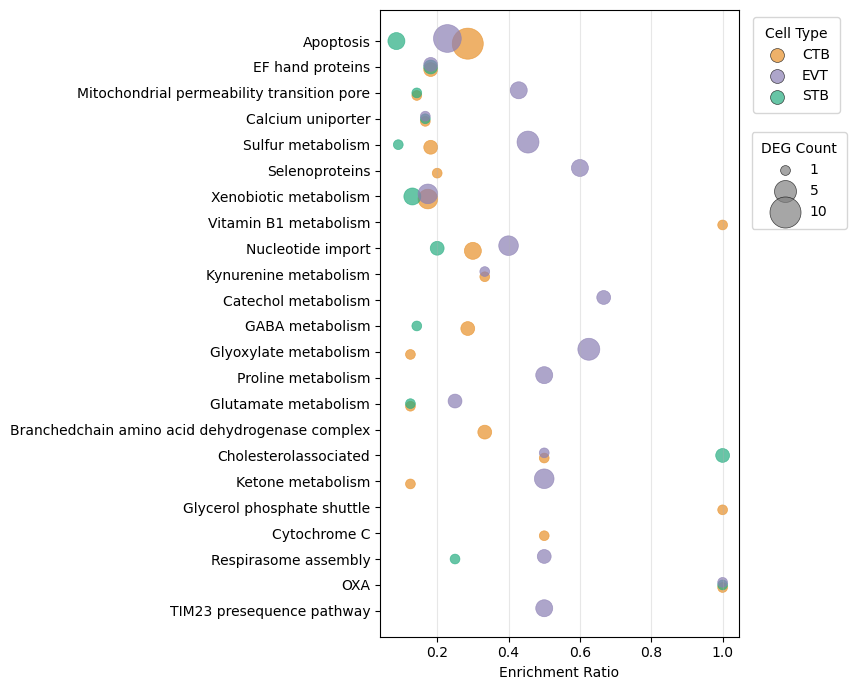

In [62]:
# Create dot plot with systematic offsets
plt.figure(figsize=(10, 7))
colors = {'CTB': '#E8912A', 'EVT': '#8B7FB4', 'STB': '#26AD81'}

# Define custom pathway order (bottom to top)
custom_pathway_order = [
    'TIM23 presequence pathway',
    'OXA',
    'Respirasome assembly',
    'Cytochrome C',
    'Glycerol phosphate shuttle',
    'Ketone metabolism',
    'Cholesterolassociated',
    'Branchedchain amino acid dehydrogenase complex',
    'Glutamate metabolism',
    'Proline metabolism',
    'Glyoxylate metabolism',
    'GABA metabolism',
    'Catechol metabolism',
    'Kynurenine metabolism',
    'Nucleotide import',
    'Vitamin B1 metabolism',
    'Xenobiotic metabolism',
    'Selenoproteins',
    'Sulfur metabolism',
    'Calcium uniporter',
    'Mitochondrial permeability transition pore',
    'EF hand proteins',
    'Apoptosis'
]

# Filter custom order to only include pathways that exist in your data
pathways_in_data = plot_data['MitoPathway_clean'].unique()
ordered_pathways = [pathway for pathway in custom_pathway_order if pathway in pathways_in_data]

# Add any pathways from your data that aren't in the custom order (in case you missed any)
remaining_pathways = [pathway for pathway in pathways_in_data if pathway not in ordered_pathways]
final_pathway_order = ordered_pathways + sorted(remaining_pathways)

# Create y-positions using custom order
y_positions = {pathway: i for i, pathway in enumerate(final_pathway_order)}

# Define systematic offsets for each cell type
offsets = {'CTB': -0.1, 'STB': 0.0, 'EVT': 0.1}

# Plot the data with offsets
for cell_type in ['CTB', 'STB', 'EVT']:
    cell_data = plot_data[plot_data['Cell_Type'] == cell_type]
    
    # Apply consistent offset for this cell type
    y_coords = [y_positions[pathway] + offsets[cell_type] 
                for pathway in cell_data['MitoPathway_clean']]
    
    plt.scatter(cell_data['Enrichment_Ratio'],
               y_coords,
               s=cell_data['Significant_Count'] * 50,
               c=colors[cell_type],
               alpha=0.7,
               label=cell_type,
               linewidth=0.5)

plt.xlabel('Enrichment Ratio')
#plt.ylabel('Mitochondrial Pathways')
#plt.title('Top Enriched Mitochondrial Pathways Across Cell Types')

# Set y-tick labels using custom order
plt.yticks(list(y_positions.values()), final_pathway_order)
plt.grid(axis='x', alpha=0.3)

# Create cell type legend (colors)
cell_type_legend_elements = []
for cell_type, color in colors.items():
    cell_type_legend_elements.append(plt.scatter([], [], s=100, c=color, alpha=0.7,
                                                edgecolors='black', linewidth=0.5))

cell_type_legend = plt.legend(cell_type_legend_elements, list(colors.keys()),
                             title='Cell Type',
                             loc='upper right',
                             borderpad=0.7,
                             bbox_to_anchor=(1.3, 1))

# Add the first legend back to the plot
plt.gca().add_artist(cell_type_legend)


# Create size legend elements
legend_counts = [1, 5, 10]

size_legend_elements = []
for count in legend_counts:
    size_legend_elements.append(plt.scatter([], [], s=count*50, c='gray', alpha=0.7,
                                           edgecolors='black', linewidth=0.5))

# Add the size legend
size_legend = plt.legend(size_legend_elements, ['1', '5', '10'],
                        title='DEG Count',
                        loc='lower right',
                        borderpad=0.7,
                        bbox_to_anchor=(1.32, 0.64))


plt.tight_layout()
plt.savefig("sc_enrichedpathways.png", dpi=300, bbox_inches='tight')
plt.show()